In [1]:
import pandas as pd
df=pd.read_csv('CVD_cleaned.csv')
df.shape

(308854, 19)

In [2]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
columns = df.columns.tolist()
heart_disease_col = columns.pop(columns.index("Heart_Disease"))
columns.append(heart_disease_col)
df = df[columns]
df.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,No
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,Yes
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,No
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,Yes
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,No


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
print(df.dtypes)

General_Health                   object
Checkup                          object
Exercise                         object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
Heart_Disease                    object
dtype: object


In [7]:
import pandas as pd
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns

# Calculate statistics for each numerical column
statistics = {}
for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]  # Mode can return multiple values, so we take the first one
    std_dev = df[col].std()
    statistics[col] = {'Mean': mean, 'Median': median, 'Mode': mode, 'Standard Deviation': std_dev}

# Display the calculated statistics
for col, stats in statistics.items():
    print(f"Column: {col}")
    print(f"\tMean: {stats['Mean']}")
    print(f"\tMedian: {stats['Median']}")
    print(f"\tMode: {stats['Mode']}")
    print(f"\tStandard Deviation: {stats['Standard Deviation']}")

Column: Height_(cm)
	Mean: 170.61524862880196
	Median: 170.0
	Mode: 168.0
	Standard Deviation: 10.658026052139187
Column: Weight_(kg)
	Mean: 83.58865454210795
	Median: 81.65
	Mode: 90.72
	Standard Deviation: 21.343209763030625
Column: BMI
	Mean: 28.626210539606948
	Median: 27.44
	Mode: 26.63
	Standard Deviation: 6.522323094693907
Column: Alcohol_Consumption
	Mean: 5.096365920467276
	Median: 1.0
	Mode: 0.0
	Standard Deviation: 8.199762520959787
Column: Fruit_Consumption
	Mean: 29.835200450698387
	Median: 30.0
	Mode: 30.0
	Standard Deviation: 24.875735359652328
Column: Green_Vegetables_Consumption
	Mean: 15.110440531772294
	Median: 12.0
	Mode: 30.0
	Standard Deviation: 14.926238423590048
Column: FriedPotato_Consumption
	Mean: 6.296615876757302
	Median: 4.0
	Mode: 4.0
	Standard Deviation: 8.582954204163514


In [8]:
non_numerical_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Calculate mode for each non-numerical column
modes = {}
for col in non_numerical_columns:
    mode = df[col].mode()[0]  # Mode can return multiple values, so we take the first one
    modes[col] = mode

# Display the calculated modes
for col, mode in modes.items():
    print(f"Column: {col}")
    print(f"\tMode: {mode}")

Column: General_Health
	Mode: Very Good
Column: Checkup
	Mode: Within the past year
Column: Exercise
	Mode: Yes
Column: Skin_Cancer
	Mode: No
Column: Other_Cancer
	Mode: No
Column: Depression
	Mode: No
Column: Diabetes
	Mode: No
Column: Arthritis
	Mode: No
Column: Sex
	Mode: Female
Column: Age_Category
	Mode: 65-69
Column: Smoking_History
	Mode: No
Column: Heart_Disease
	Mode: No


In [9]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [10]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Heart_Disease                   0
dtype: int64


In [11]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Distinct Attributes: {unique_values}")
    print()

Column: General_Health
Distinct Attributes: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

Column: Checkup
Distinct Attributes: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']

Column: Exercise
Distinct Attributes: ['No' 'Yes']

Column: Skin_Cancer
Distinct Attributes: ['No' 'Yes']

Column: Other_Cancer
Distinct Attributes: ['No' 'Yes']

Column: Depression
Distinct Attributes: ['No' 'Yes']

Column: Diabetes
Distinct Attributes: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']

Column: Arthritis
Distinct Attributes: ['Yes' 'No']

Column: Sex
Distinct Attributes: ['Female' 'Male']

Column: Age_Category
Distinct Attributes: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']

Column: Height_(cm)
Distinct Attributes: [150. 165. 163. 180. 191. 183. 175. 160. 168. 178. 152. 157. 188. 185.
 170. 173. 155. 193. 196. 206. 198. 140.

In [12]:
from sklearn.preprocessing import LabelEncoder
columns_for_label_encoding = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                              'Depression', 'Diabetes', 'Arthritis', 'Sex','Smoking_History']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in columns_for_label_encoding:
    df[col] = label_encoder.fit_transform(df[col])

In [13]:
df.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,Poor,Within the past 2 years,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,0
1,Very Good,Within the past year,0,0,0,0,2,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1
2,Very Good,Within the past year,1,0,0,0,2,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,0
3,Poor,Within the past year,1,0,0,0,2,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,1
4,Good,Within the past year,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0


In [14]:
import pandas as pd
# Assuming y_resampled is the balanced target variable after resampling
value_counts = pd.Series(df['Heart_Disease']).value_counts()
# Print the count of values in the target column
print("Count of values in the target column after balancing:")
print(value_counts)

Count of values in the target column after balancing:
0    283883
1     24971
Name: Heart_Disease, dtype: int64


In [15]:
pip install imbalanced-learn

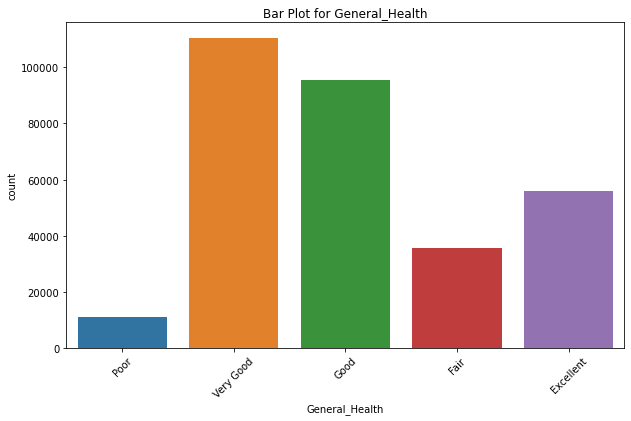

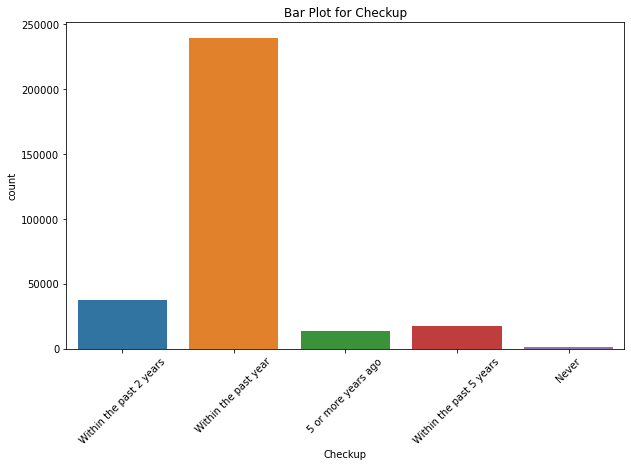

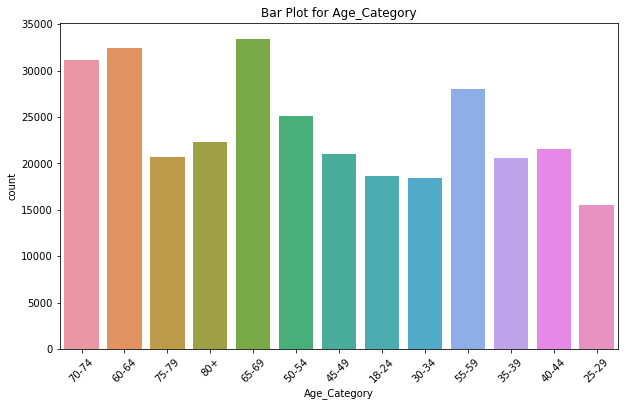

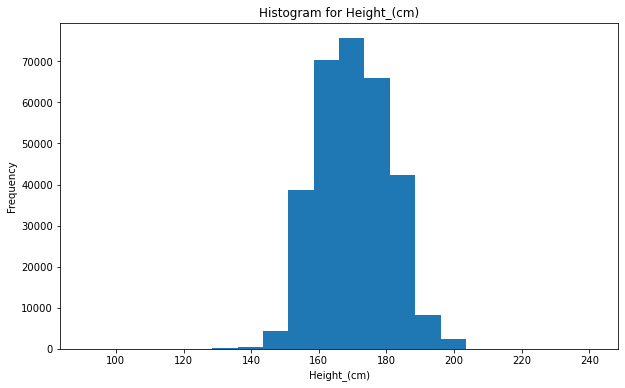

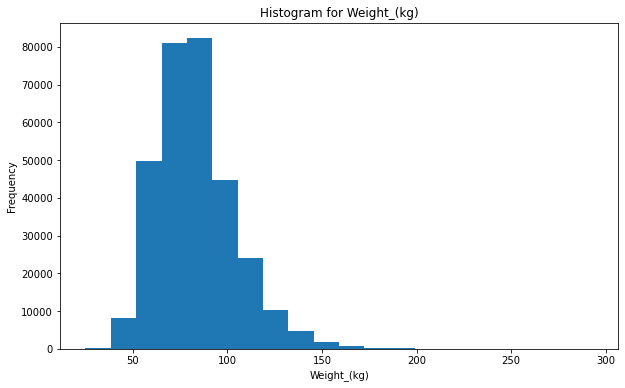

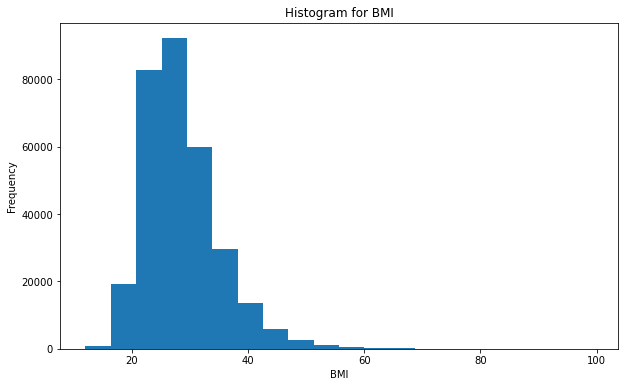

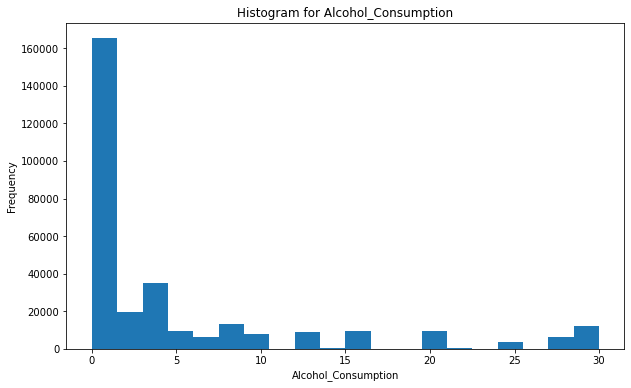

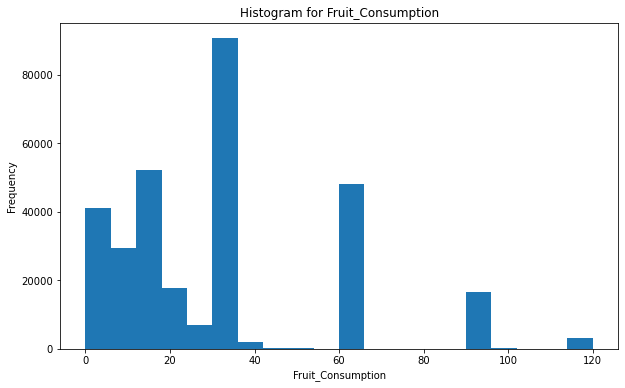

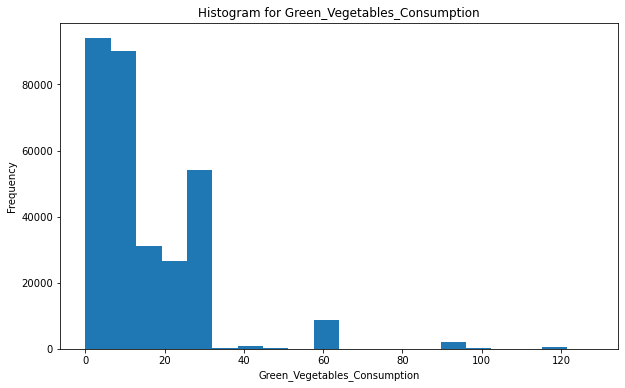

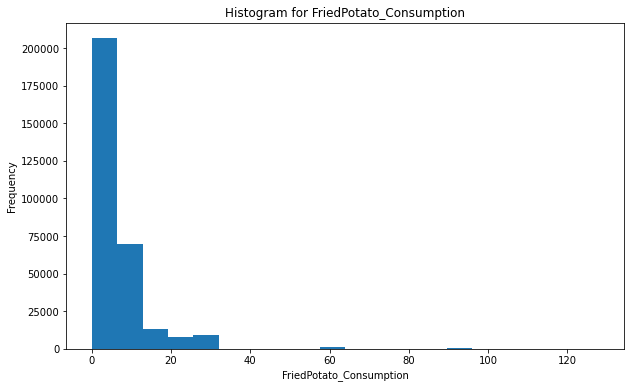

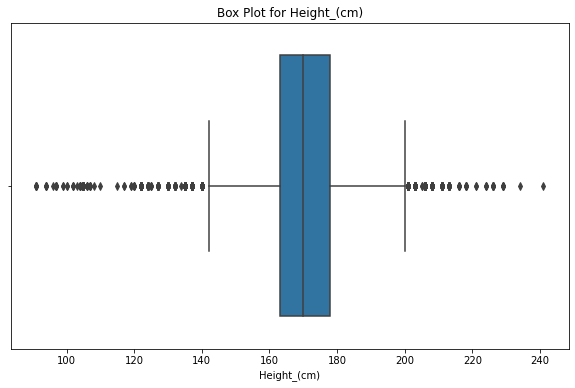

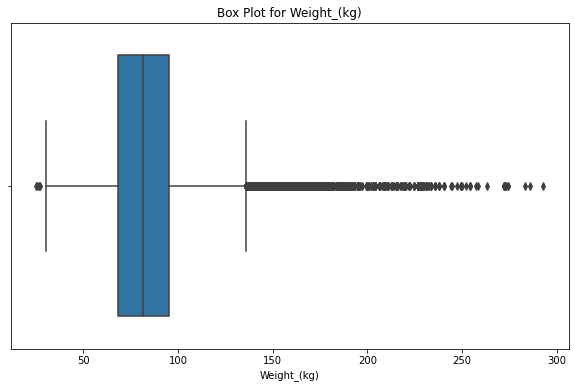

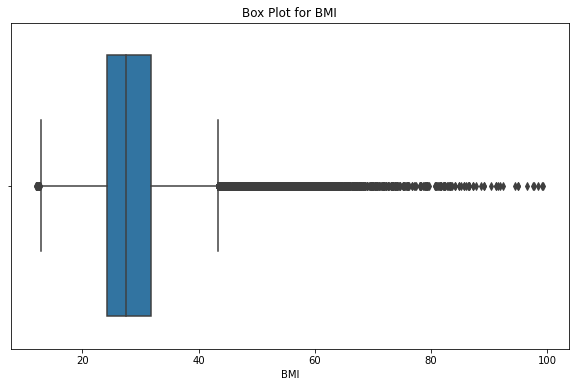

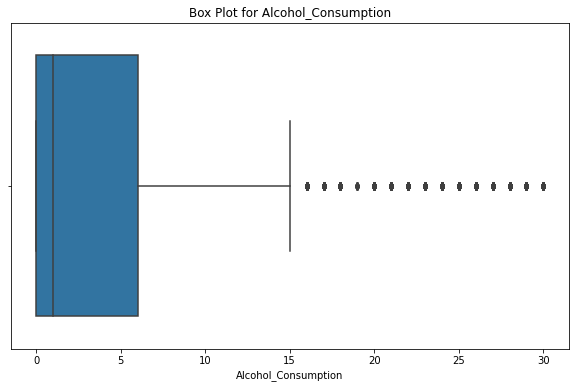

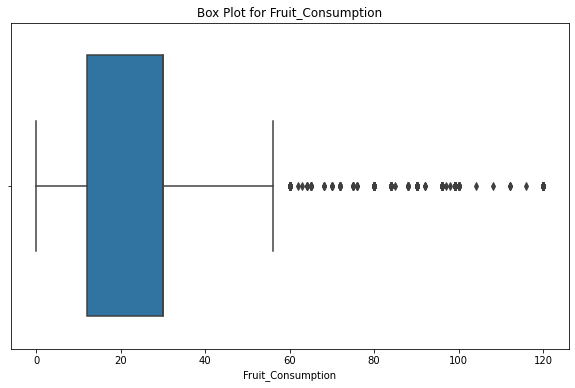

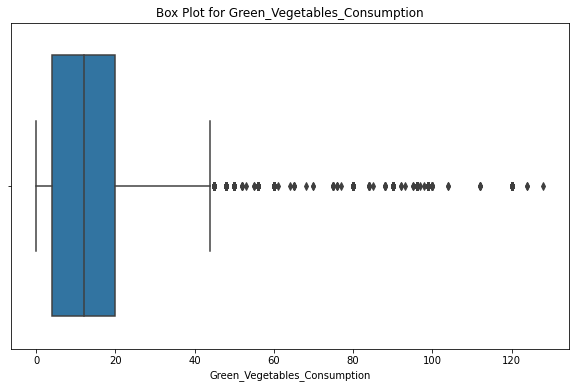

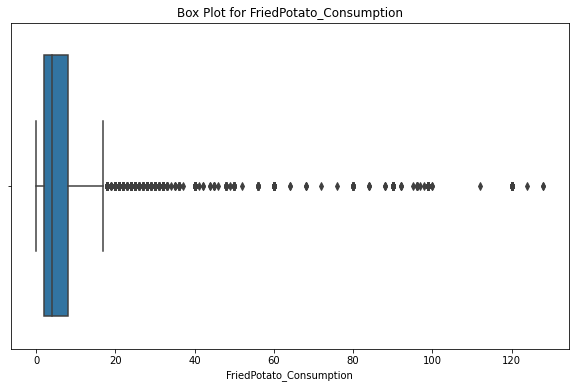

<Figure size 720x432 with 0 Axes>

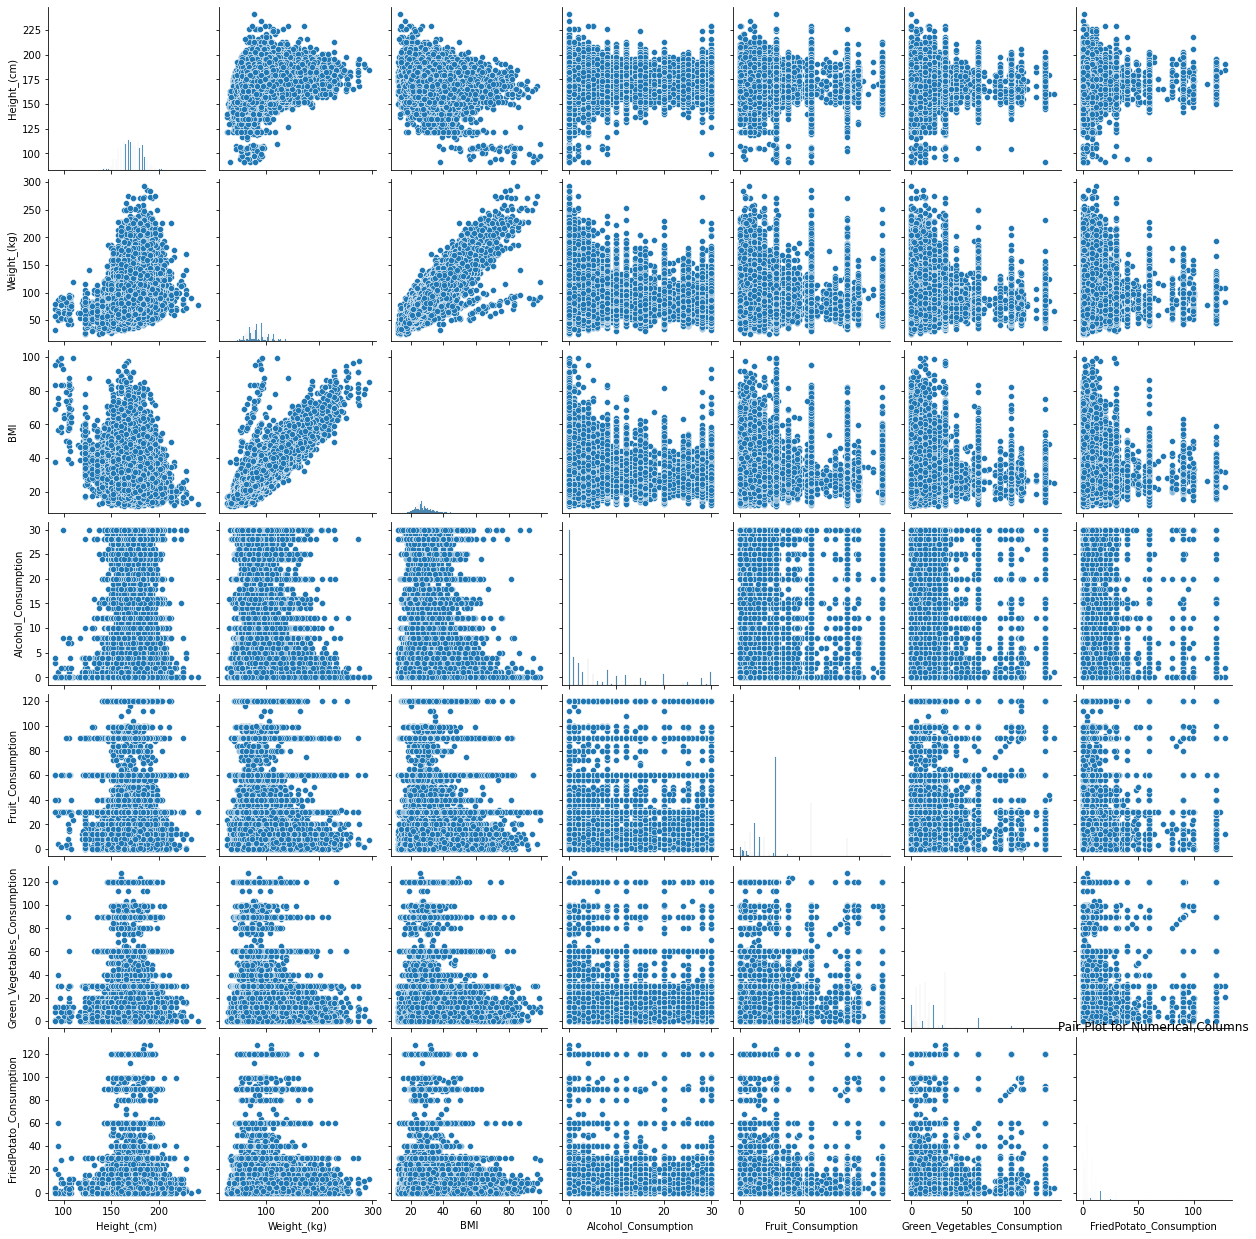

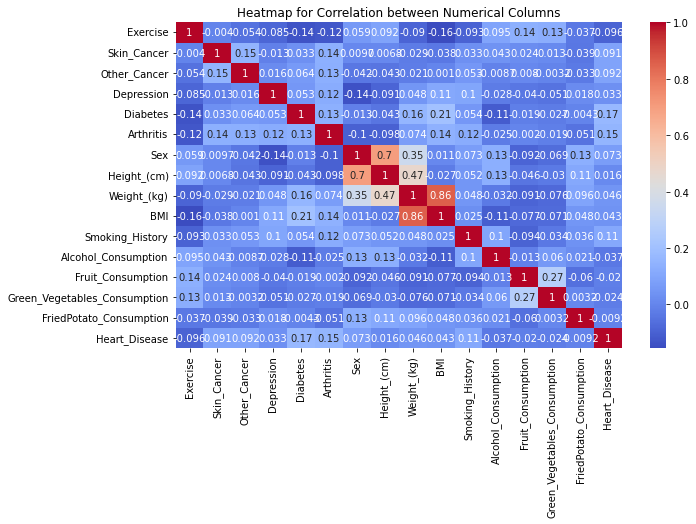

In [16]:
fixed_figsize = (10, 6)
# Bar plot for categorical columns
for col in df.select_dtypes(include=['object']):
    plt.figure(figsize=fixed_figsize)
    sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot for {col}')
    plt.xticks(rotation=45)
    plt.show()
# Histogram for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=fixed_figsize)
    plt.hist(df[col], bins=20)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
# Box plot for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=fixed_figsize)
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()
# Pair plot for numerical columns
plt.figure(figsize=fixed_figsize)
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.title('Pair Plot for Numerical Columns')
plt.show()
# Heatmap for correlation between numerical columns
plt.figure(figsize=fixed_figsize)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation between Numerical Columns')
plt.show()

<Figure size 720x720 with 0 Axes>

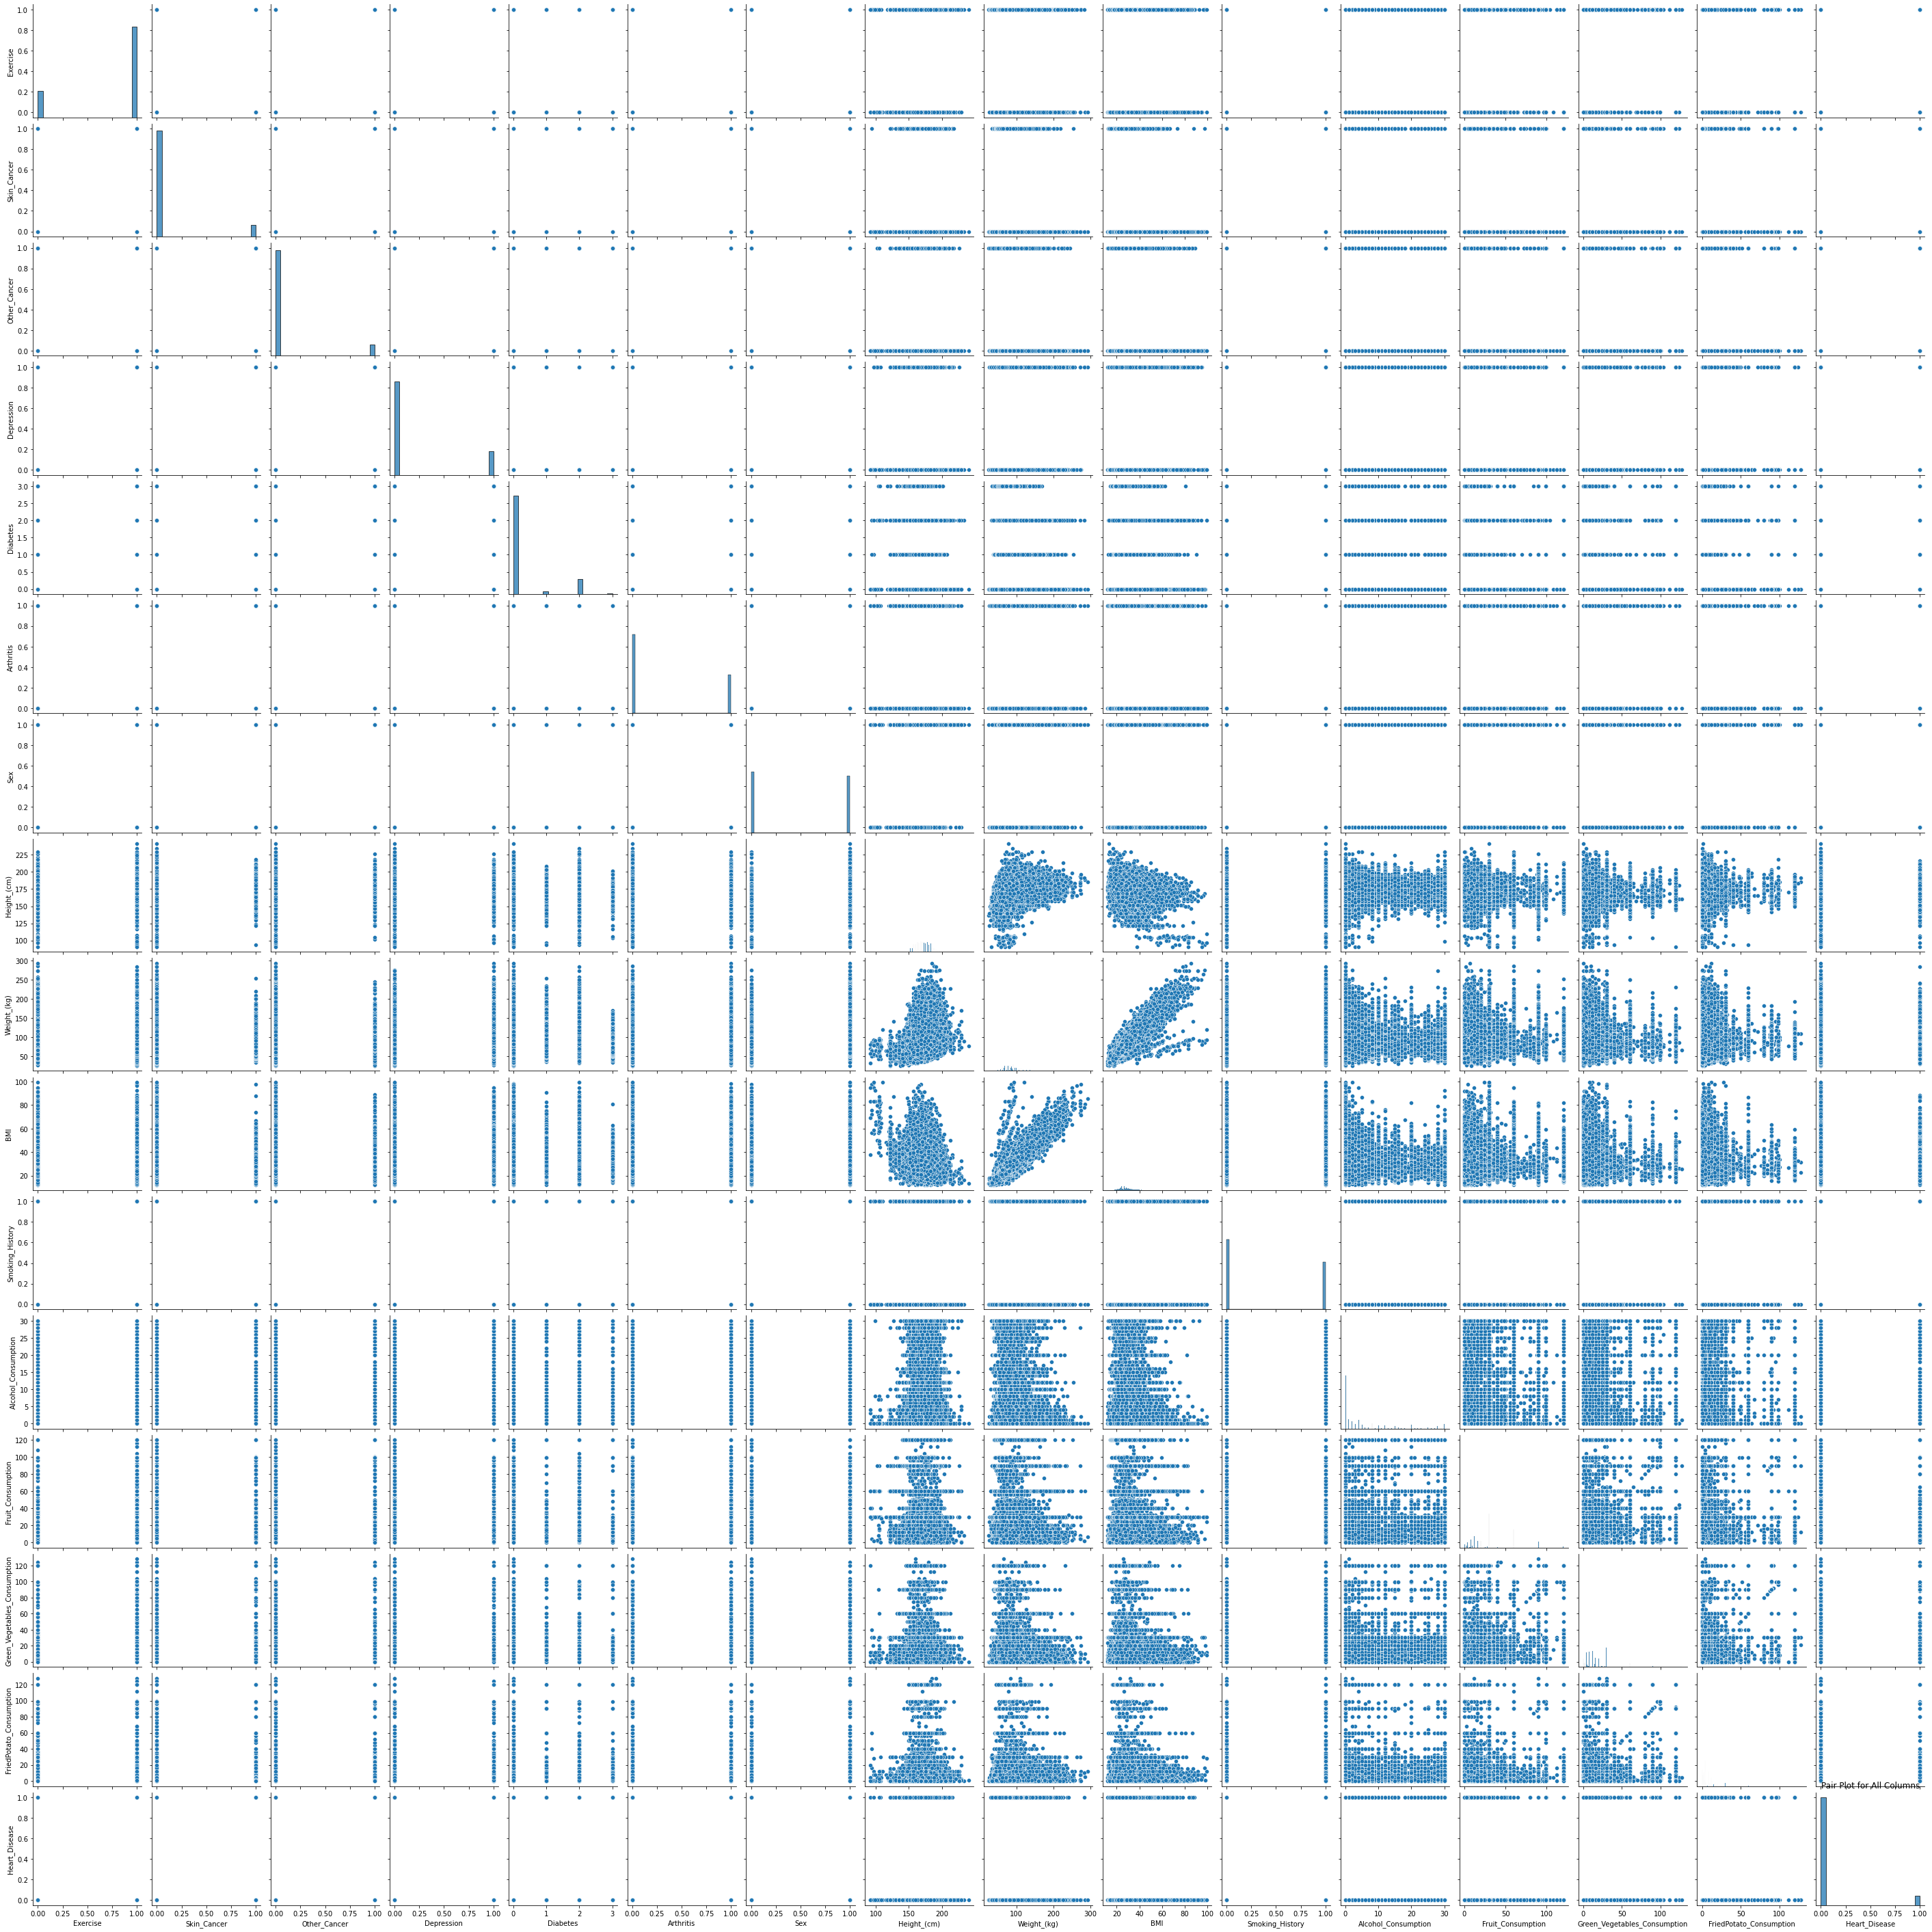

In [17]:
fixed_figsize = (10, 10)
# Pair plot for all columns
plt.figure(figsize=fixed_figsize)
sns.pairplot(df)
plt.title('Pair Plot for All Columns')
plt.show()

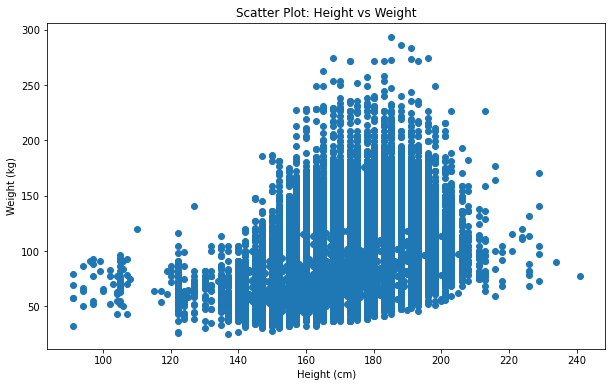

In [18]:
# Set the fixed figure size
fixed_figsize = (10, 6)
# Scatter plot
plt.figure(figsize=fixed_figsize)
plt.scatter(df['Height_(cm)'], df['Weight_(kg)'])
plt.title('Scatter Plot: Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

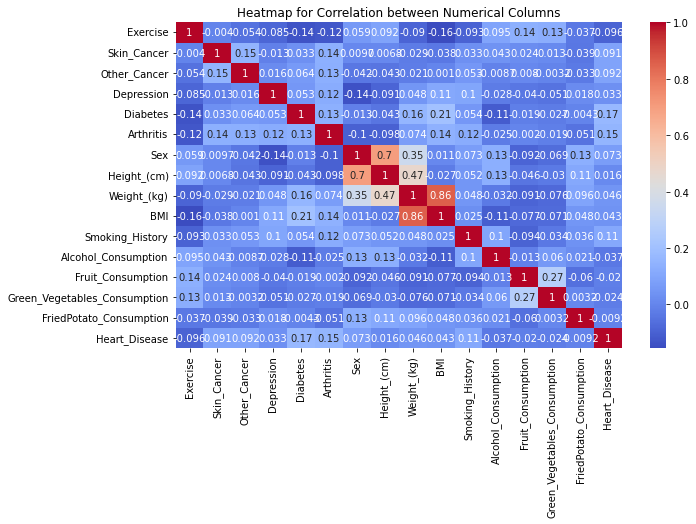

In [19]:
plt.figure(figsize=fixed_figsize)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation between Numerical Columns')
plt.show()

In [20]:
# Assuming 'df' is your DataFrame containing categorical variables
df_encoded = pd.get_dummies(df)

In [21]:
# Identify categorical columns in your DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [23]:
df

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,3,2,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,0
1,4,4,0,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1
2,4,4,1,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,0
3,3,4,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,1
4,2,4,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,4,1,0,0,0,0,0,1,1,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0,0
308850,1,3,1,0,0,0,2,0,1,9,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0,0
308851,4,0,1,0,0,1,3,0,0,2,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0,0
308852,4,4,1,0,0,0,0,0,1,9,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0,0


In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# Separate features (X) and target variable (y)
X = df.drop('Heart_Disease', axis=1)  # Assuming 'Heart_Disease' is the name of the target column
y = df['Heart_Disease']
# Define the over-sampling strategy (SMOTE) for minority class
over_sampling = SMOTE(sampling_strategy=1)
# Define the under-sampling strategy (RandomUnderSampler) for majority class
under_sampling = RandomUnderSampler(sampling_strategy=1)
# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([('over_sampling', over_sampling), ('under_sampling', under_sampling)])
# Perform over-sampling and under-sampling
X_resampled, y_resampled = pipeline.fit_resample(X, y)
# Print the count of values in the target column after balancing
print("Count of values in the target column after balancing:")
print(pd.Series(y_resampled).value_counts())

Count of values in the target column after balancing:
0    283883
1    283883
Name: Heart_Disease, dtype: int64


In [25]:
df=pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Heart_Disease'])], axis=1)

In [26]:
df.shape

(567766, 19)

In [27]:
df.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,3,2,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,0
2,4,4,1,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,0
4,2,4,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0
5,2,4,0,0,0,1,0,1,1,8,183.0,154.22,46.11,0,0.0,12.0,12.0,12.0,0
7,2,4,1,0,0,0,0,1,0,9,165.0,108.86,39.94,1,3.0,30.0,8.0,8.0,0


In [28]:
from sklearn.preprocessing import StandardScaler
# Assuming 'df' is your original DataFrame containing the data to be scaled
# 'Heart_Disease' column index, change it according to your DataFrame if necessary
heart_disease_index = df.columns.get_loc('Heart_Disease')

# Separate the 'Heart_Disease' column from the rest of the DataFrame
heart_disease_column = df.iloc[:, heart_disease_index]
df_features = df.drop('Heart_Disease', axis=1)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it, excluding the 'Heart_Disease' column
scaled_data = scaler.fit_transform(df_features)

# Create a new DataFrame with scaled features
df= pd.DataFrame(scaled_data, columns=df_features.columns)

# Merge scaled features with the 'Heart_Disease' column
df['Heart_Disease'] = heart_disease_column.values
# Now df_scaled contains the scaled features merged with the 'Heart_Disease' column

In [29]:
df

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,0.717464,-1.861225,-1.280610,-0.280746,-0.276455,-0.407154,-0.539236,1.402886,-0.987029,0.736464,-1.985966,-2.451617,-2.236144,1.265262,-0.558653,0.036984,0.101560,0.705865,0
1,1.486412,0.426285,0.780878,-0.280746,-0.276455,-0.407154,2.135854,-0.712816,-0.987029,0.108789,-0.748651,0.157133,0.681236,-0.790350,-0.067197,-0.691386,-0.797451,1.183402,0
2,-0.051484,0.426285,-1.280610,-0.280746,-0.276455,-0.407154,-0.539236,-0.712816,1.013141,1.364138,1.916336,0.157133,-0.721202,1.265262,-0.558653,-0.853246,-0.728297,-0.726745,0
3,-0.051484,0.426285,-1.280610,-0.280746,-0.276455,2.456072,-0.539236,1.402886,1.013141,0.108789,1.154911,3.232550,2.629239,-0.790350,-0.558653,-0.691386,-0.175059,0.705865,0
4,-0.051484,0.426285,0.780878,-0.280746,-0.276455,-0.407154,-0.539236,1.402886,-0.987029,0.422626,-0.558295,1.111508,1.678355,1.265262,-0.190061,0.036984,-0.451678,0.228328,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567761,-0.051484,0.426285,-1.280610,-0.280746,-0.276455,-0.407154,0.798309,-0.712816,-0.987029,-0.205048,-0.799049,-1.370015,-1.210814,-0.790350,-0.558653,-1.034145,-0.451678,-0.670576,1
567762,0.717464,0.426285,-1.280610,-0.280746,-0.276455,-0.407154,-0.539236,1.402886,1.013141,0.736464,0.648288,0.233584,-0.071969,-0.790350,2.512951,0.015207,-1.004915,-0.620210,1
567763,-0.820432,0.426285,-1.280610,-0.280746,-0.276455,-0.407154,0.798309,-0.712816,1.013141,-0.205048,0.203130,0.040306,-0.036394,-0.790350,-0.558653,-0.691386,-0.735256,-0.499991,1
567764,-0.051484,0.426285,-1.280610,-0.280746,-0.276455,-0.407154,-0.539236,-0.712816,-0.987029,-0.205048,-1.253489,-1.423778,-1.106313,1.265262,1.312808,-1.108344,-1.004915,-0.065823,1


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = df.drop('Heart_Disease', axis=1) 
y = df['Heart_Disease']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape

(454212, 18)

In [53]:
X_test

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
43507,-0.051484,0.426285,-1.280610,3.561934,-0.276455,-0.407154,-0.539236,-0.712816,-0.987029,-1.146560,-1.319719,-1.179273,-0.756649,-0.79035,-0.067197,1.250935,1.069725,-0.726745
388845,-1.589379,-1.861225,0.780878,3.561934,-0.276455,-0.407154,-0.539236,-0.712816,1.013141,0.108789,1.790806,-0.408126,-1.190605,-0.79035,2.922055,2.464885,-0.406074,-0.607361
316002,-0.051484,0.426285,-1.280610,-0.280746,3.617222,-0.407154,-0.539236,-0.712816,-0.987029,0.108789,-0.082404,0.050988,0.109473,-0.79035,1.284309,-0.706867,-0.155217,-0.510813
380418,-0.820432,0.426285,0.780878,-0.280746,-0.276455,-0.407154,0.798309,1.402886,-0.987029,1.364138,-1.406127,-0.978472,-0.429605,-0.79035,-0.558653,0.036984,-0.728297,-0.553169
535280,-0.051484,0.426285,0.780878,-0.280746,-0.276455,-0.407154,-0.539236,1.402886,-0.987029,1.364138,-1.034185,-0.903388,-0.517772,-0.79035,-0.558653,2.464885,1.069725,-0.726745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264983,-1.589379,0.426285,0.780878,-0.280746,-0.276455,-0.407154,-0.539236,-0.712816,1.013141,-1.146560,-0.748651,1.005363,1.740000,-0.79035,1.898630,-0.853246,-0.728297,0.228328
192911,1.486412,0.426285,0.780878,-0.280746,-0.276455,-0.407154,-0.539236,1.402886,-0.987029,0.736464,-1.319719,-0.606461,0.004675,-0.79035,-0.558653,2.464885,-0.175059,-0.607361
330480,-1.589379,-0.717470,-1.280610,-0.280746,-0.276455,-0.407154,-0.539236,-0.712816,1.013141,-0.518886,0.702396,-0.173870,-0.523069,-0.79035,-0.558653,-0.367666,0.093068,-0.234548
121424,1.486412,0.426285,0.780878,-0.280746,-0.276455,-0.407154,-0.539236,1.402886,1.013141,-1.774235,1.154911,1.854060,1.271493,-0.79035,0.178532,1.250935,0.378178,-0.249208


In [33]:
y_train.shape

(454212,)

In [34]:
y_test.shape

(113554,)

In [35]:
X_test.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
43507,-0.051484,0.426285,-1.280610,3.561934,-0.276455,-0.407154,-0.539236,-0.712816,-0.987029,-1.146560,-1.319719,-1.179273,-0.756649,-0.79035,-0.067197,1.250935,1.069725,-0.726745
388845,-1.589379,-1.861225,0.780878,3.561934,-0.276455,-0.407154,-0.539236,-0.712816,1.013141,0.108789,1.790806,-0.408126,-1.190605,-0.79035,2.922055,2.464885,-0.406074,-0.607361
316002,-0.051484,0.426285,-1.280610,-0.280746,3.617222,-0.407154,-0.539236,-0.712816,-0.987029,0.108789,-0.082404,0.050988,0.109473,-0.79035,1.284309,-0.706867,-0.155217,-0.510813
380418,-0.820432,0.426285,0.780878,-0.280746,-0.276455,-0.407154,0.798309,1.402886,-0.987029,1.364138,-1.406127,-0.978472,-0.429605,-0.79035,-0.558653,0.036984,-0.728297,-0.553169
535280,-0.051484,0.426285,0.780878,-0.280746,-0.276455,-0.407154,-0.539236,1.402886,-0.987029,1.364138,-1.034185,-0.903388,-0.517772,-0.79035,-0.558653,2.464885,1.069725,-0.726745


In [36]:
y_test.head()

43507     0
388845    1
316002    1
380418    1
535280    1
Name: Heart_Disease, dtype: int32

In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)
y_pred_logistic_reg = logistic_reg_model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_logistic_reg = accuracy_score(y_test, y_pred_logistic_reg)
print(accuracy_logistic_reg)

0.7543635627102524


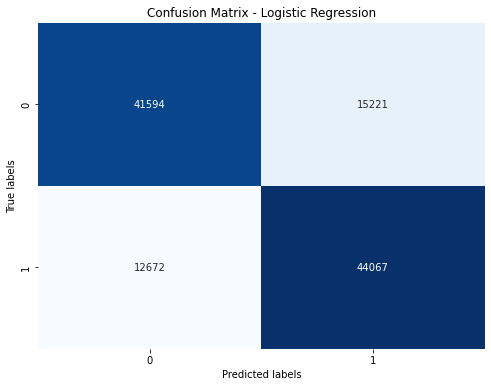

In [38]:
#confusion matrix for Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred_logistic_reg = logistic_reg_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_logistic_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

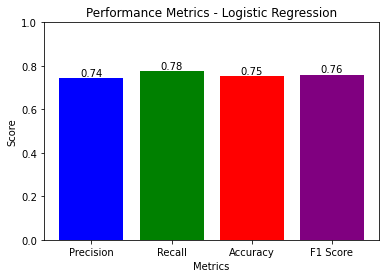

In [39]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
# Calculate precision, recall, accuracy, and F1 score
precision = precision_score(y_test, y_pred_logistic_reg)
recall = recall_score(y_test, y_pred_logistic_reg)
accuracy = accuracy_score(y_test, y_pred_logistic_reg)
f1 = f1_score(y_test, y_pred_logistic_reg)
# Plot the metrics
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
values = [precision, recall, accuracy, f1]
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Performance Metrics - Logistic Regression')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization of scores

# Annotate bars with values
for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

In [40]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(accuracy_decision_tree)

0.8872342673970094


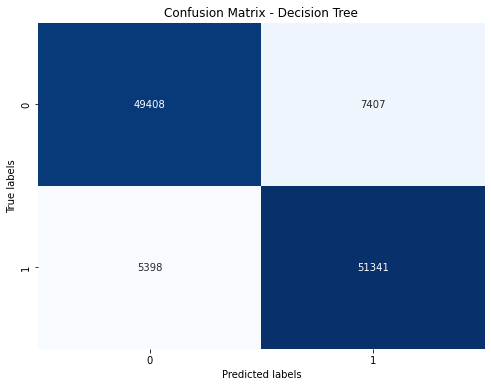

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred_decision_tree = decision_tree_model.predict(X_test)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

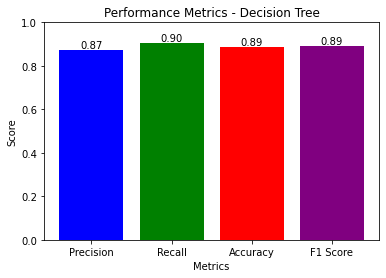

In [42]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
# Calculate precision, recall, accuracy, and F1 score
precision = precision_score(y_test, y_pred_decision_tree)
recall = recall_score(y_test, y_pred_decision_tree)
accuracy = accuracy_score(y_test, y_pred_decision_tree)
f1 = f1_score(y_test, y_pred_decision_tree)
# Plot the metrics
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
values = [precision, recall, accuracy, f1]
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Performance Metrics - Decision Tree')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization of scores
# Annotate bars with values
for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

In [49]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(accuracy_random_forest)

0.9320939817179492


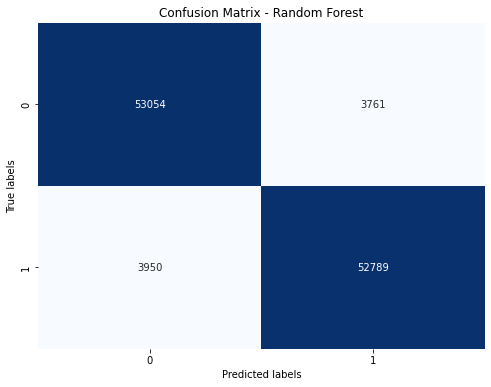

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_random_forest = random_forest_model.predict(X_test)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [52]:
# Save the model to a pickle file
import pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)


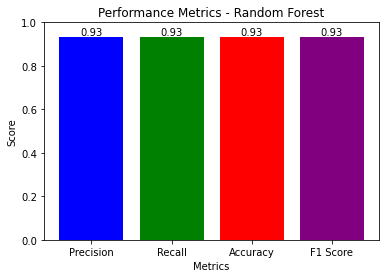

In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
# Calculate precision, recall, accuracy, and F1 score
precision = precision_score(y_test, y_pred_random_forest)
recall = recall_score(y_test, y_pred_random_forest)
accuracy = accuracy_score(y_test, y_pred_random_forest)
f1 = f1_score(y_test, y_pred_random_forest)
# Plot the metrics
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
values = [precision, recall, accuracy, f1]
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Performance Metrics - Random Forest')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization of scores

# Annotate bars with values
for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Assuming X_train, X_test, y_train, y_test are already defined
# Create a KNN classifier
knn_model = KNeighborsClassifier()
# Train the KNN model
knn_model.fit(X_train, y_train)
# Predict using the trained model
y_pred_knn = knn_model.predict(X_test)
# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", accuracy_knn)

Accuracy of KNN: 0.8475174806699896


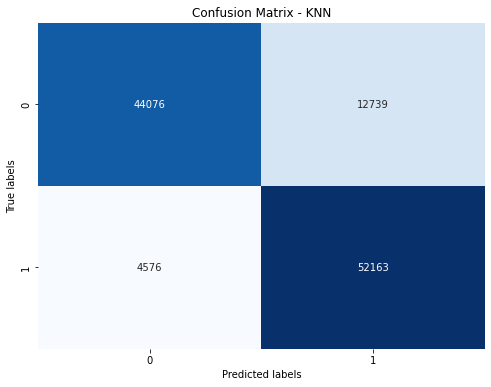

In [47]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred_knn and y_test are already defined

# Confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN')
plt.show()

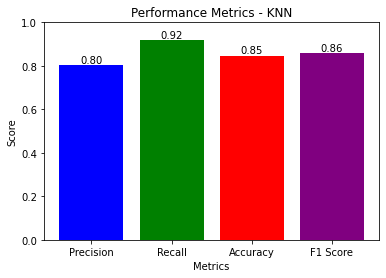

In [48]:
# Calculate precision, recall, accuracy, and F1 score for KNN
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Plot the metrics for KNN
metrics_knn = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
values_knn = [precision_knn, recall_knn, accuracy_knn, f1_knn]
plt.bar(metrics_knn, values_knn, color=['blue', 'green', 'red', 'purple'])
plt.title('Performance Metrics - KNN')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization of scores

# Annotate bars with values
for i, value in enumerate(values_knn):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()